# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BBC News Test.csv')

In [4]:
df.head(10)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


In [8]:
df.shape

(1490, 3)

# Unique Catergories

In [6]:
df.Category.unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [15]:
target_category = df['Category'].unique()
print(target_category)


['business' 'tech' 'politics' 'sport' 'entertainment']


# Catergorical Encoding
<h4>using pandas factorize()</h4>

In [7]:
df['CategoryId'] = df['Category'].factorize()[0]

In [20]:
df['CategoryId'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [24]:
category = df[['Category','CategoryId']].drop_duplicates().sort_values('CategoryId')
category

,Category,CategoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


# PIE CHART

In [35]:
business = df[df['CategoryId'] == 0 ]
tech = df[df['CategoryId'] == 1 ]
politics = df[df['CategoryId'] == 2 ]
sport	 = df[df['CategoryId'] == 3 ]
entertainment = df[df['CategoryId'] == 4 ]
business.head(5)

,ArticleId,Text,Category,CategoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
4,917,enron bosses in $168m payout eighteen former e...,business,0
8,2034,car giant hit by mercedes slump a slump in pro...,business,0


Expand the Pie chart to see the labels

<AxesSubplot:ylabel='Category'>

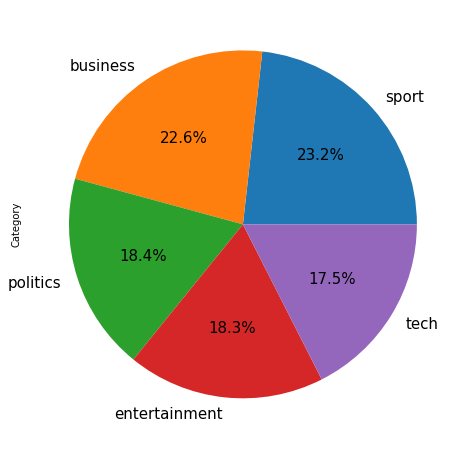

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(1,1,1)
df['Category'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=15,labels=['business','tech','politics','sport','entertainment'])

# TABLEAU VIZUALIZATION 
![](images/categories.jpg)

# WORD CLOUD

In [5]:
import re 
from wordcloud import WordCloud

In [6]:
corpus = []
for i in range(len(df.Text)):
    corpus.append(df.Text[i])


In [7]:
Document = "".join(corpus)

In [8]:
pattern = r'[^@!#$%&*():;]+'
Document = re.findall(pattern,Document)
#Document = "".join(Document)


In [20]:
with open(r"stop_words.txt","r") as sw:
    stop_words = sw.read()

In [21]:
stop_words

"i\nme\nmy\nmyself\nwe\nour\nours\nourselves\nyou\nyou're\nyou've\nyou'll\nyou'd\nyour\nyours\nyourself\nyourselves\nhe\nhim\nhis\nhimself\nshe\nshe's\nher\nhers\nherself\nit\nit's\nits\nitself\nthey\nthem\ntheir\ntheirs\nthemselves\nwhat\nwhich\nwho\nwhom\nthis\nthat\nthat'll\nthese\nthose\nam\nis\nare\nwas\nwere\nbe\nbeen\nbeing\nhave\nhas\nhad\nhaving\ndo\ndoes\ndid\ndoing\na\nan\nthe\nand\nbut\nif\nor\nbecause\nas\nuntil\nwhile\nof\nat\nby\nfor\nwith\nabout\nagainst\nbetween\ninto\nthrough\nduring\nbefore\nafter\nabove\nbelow\nto\nfrom\nup\ndown\nin\nout\non\noff\nover\nunder\nagain\nfurther\nthen\nonce\nhere\nthere\nwhen\nwhere\nwhy\nhow\nall\nany\nboth\neach\nfew\nmore\nmost\nother\nsome\nsuch\nno\nnor\nnot\nonly\nown\nsame\nso\nthan\ntoo\nvery\ns\nt\ncan\nwill\njust\ndon\ndon't\nshould\nshould've\nnow\nd\nll\nm\no\nre\nve\ny\nain\naren\naren't\ncouldn\ncouldn't\ndidn\ndidn't\ndoesn\ndoesn't\nhadn\nhadn't\nhasn\nhasn't\nhaven\nhaven't\nisn\nisn't\nma\nmightn\nmightn't\nmustn\nmus

In [22]:
stop_words = stop_words.split("\n")

In [32]:
stop_words.extend(["will","said","year","s","also","would","one","u","new","could","like","say"])

In [33]:
DOC = [word for word in Document if not word in stop_words]

In [34]:
DOC = "".join(DOC)

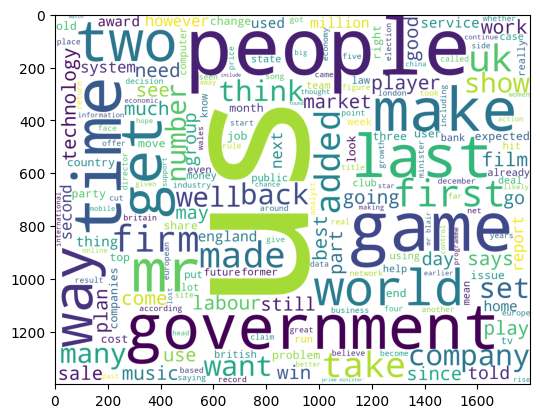

In [35]:
wordcloud_bt = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400,
                      stopwords=stop_words,
                     ).generate(DOC)

plt.imshow(wordcloud_bt)